In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("bank-full.csv",sep =";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Preprocessing & EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.agg(["median","skew","kurtosis","var"])

,age,balance,day,duration,campaign,pdays,previous
median,39.000000,4.480000e+02,16.000000,180.000000,2.000000,-1.000000,0.000000
skew,0.684818,8.360308e+00,0.093079,3.144318,4.898650,2.615715,41.846454
kurtosis,0.319570,1.407515e+02,-1.059897,18.153915,39.249651,6.935195,4506.860660
var,112.758107,9.270599e+06,69.263609,66320.574090,9.597733,10025.765774,5.305841


In [7]:
data.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


In [8]:
#checking for null values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#checking for duplicated values
data.duplicated().value_counts()

False    45211
dtype: int64

#### splitting the feature data into num and categorcial for better EDA 

In [10]:
num = data[["age","balance","day","duration","campaign","pdays","previous"]]
obj = data[["job","marital","education","default","housing","loan","contact","month","poutcome","y"]]

In [11]:
sns.set_style(style = "darkgrid")

#### Boxplot

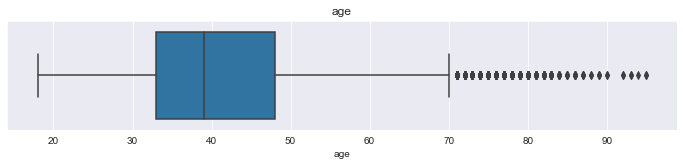

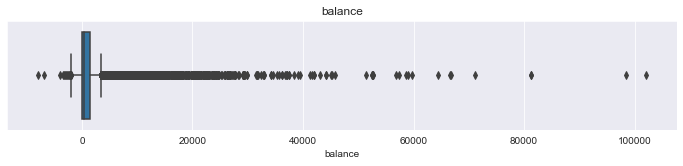

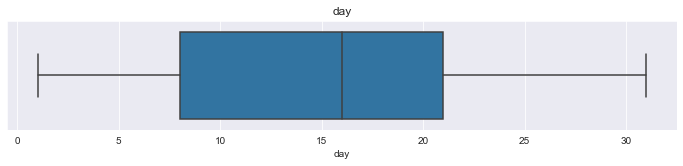

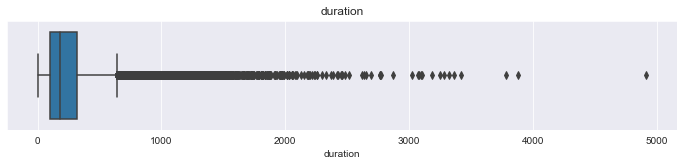

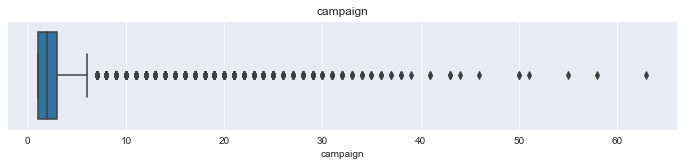

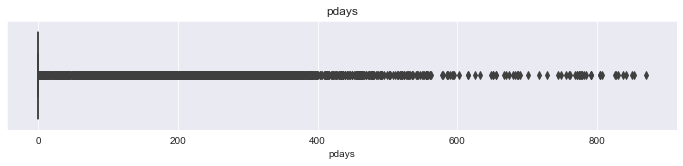

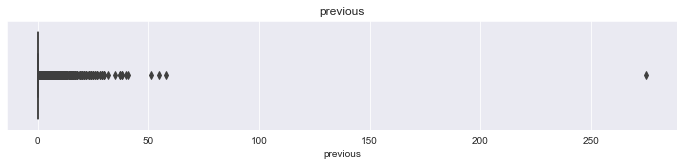

In [12]:
for i in num:
    plt.figure(figsize= (12,2))
    sns.boxplot(num[i])
    plt.title(i)
    plt.show()

#### Histogram

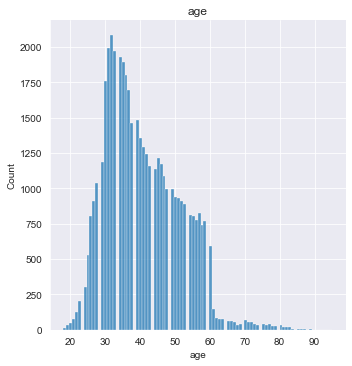

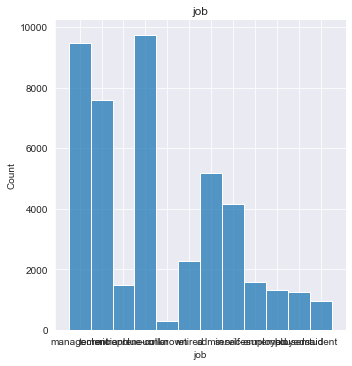

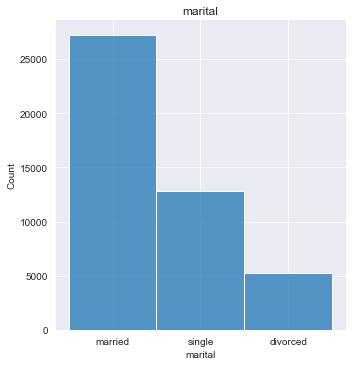

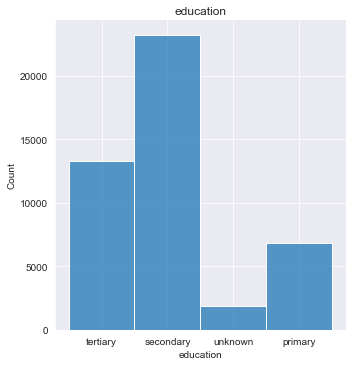

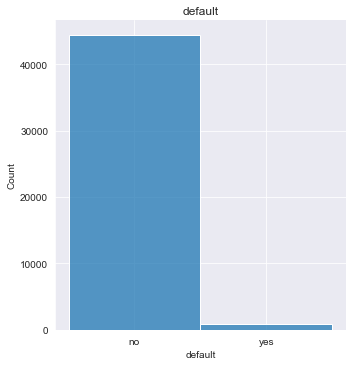

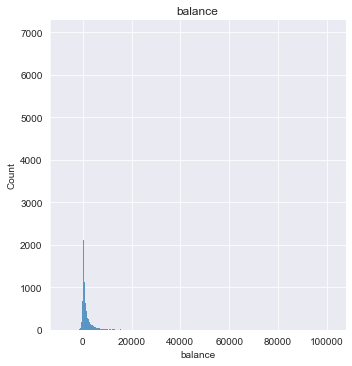

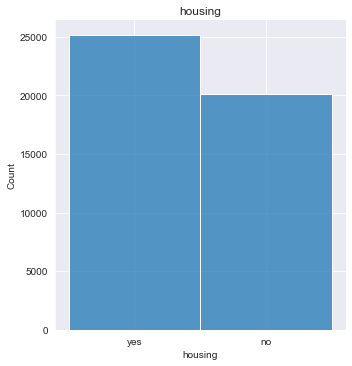

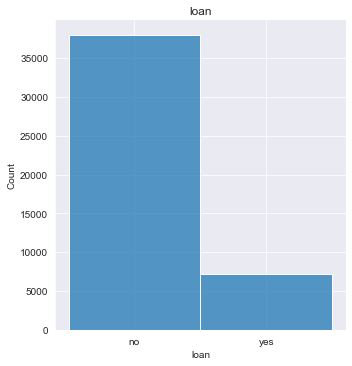

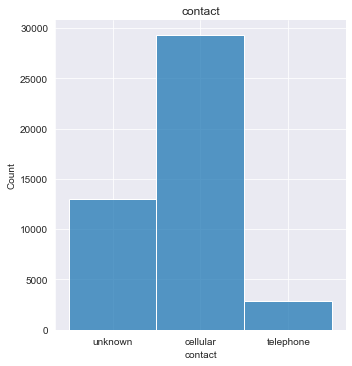

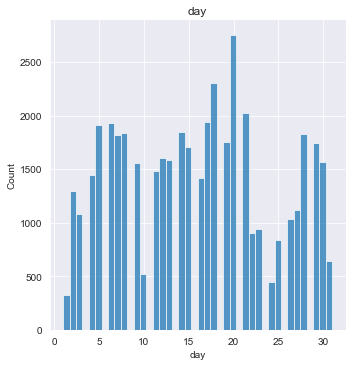

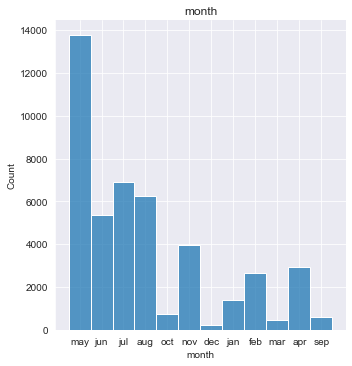

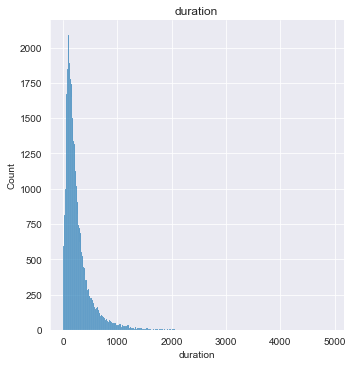

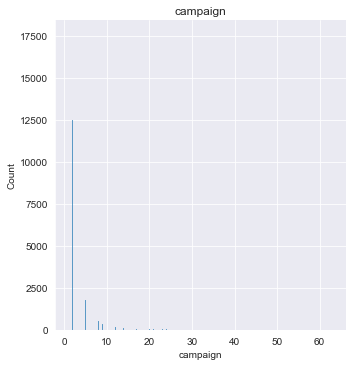

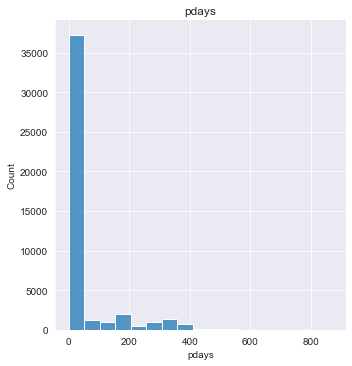

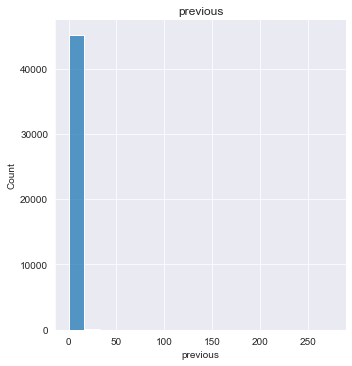

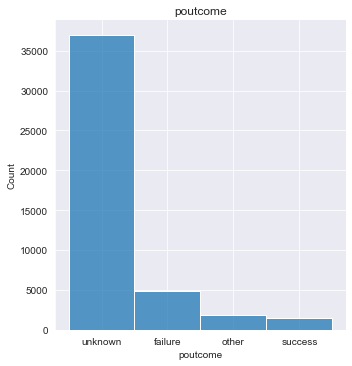

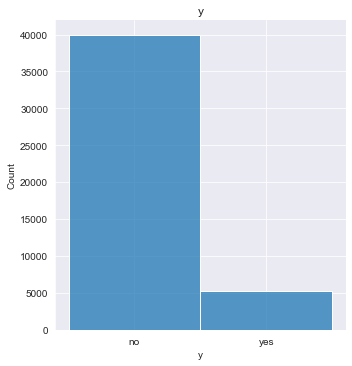

In [13]:
for i in data:
    sns.displot(data[i])
    plt.title(i)
    plt.show()

### Plots for categorical features visualization

#### Countplot

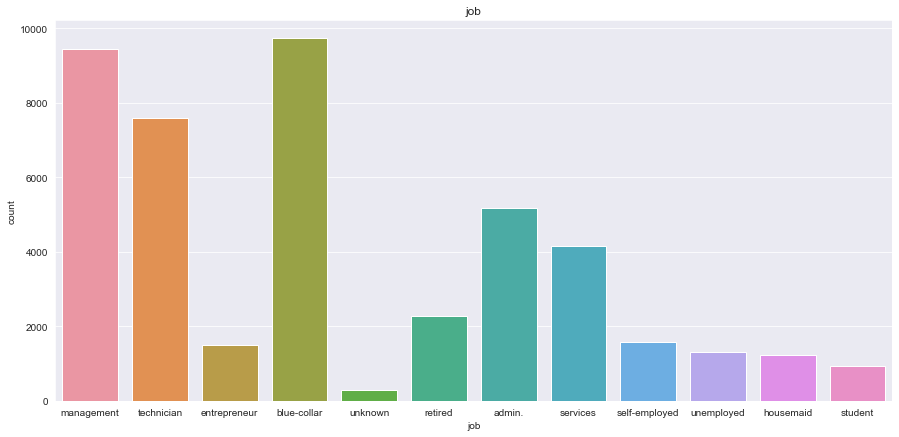

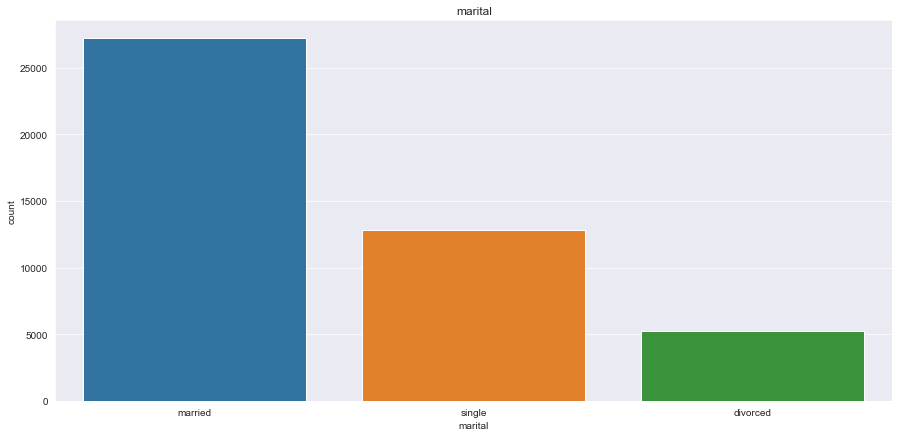

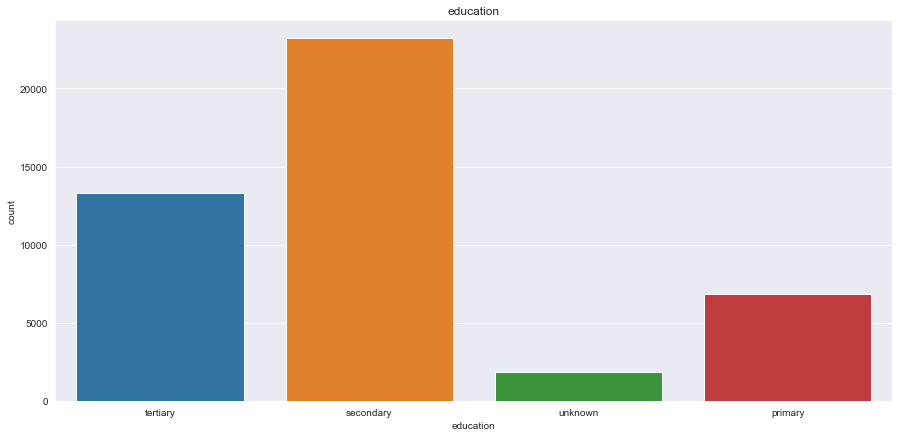

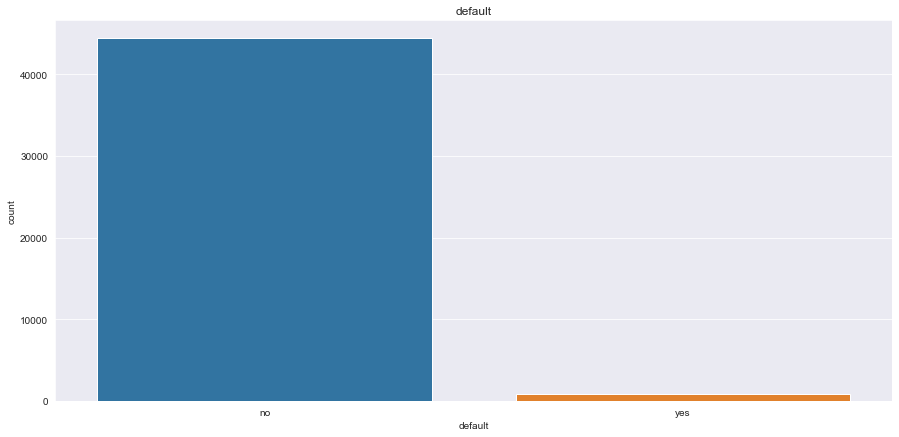

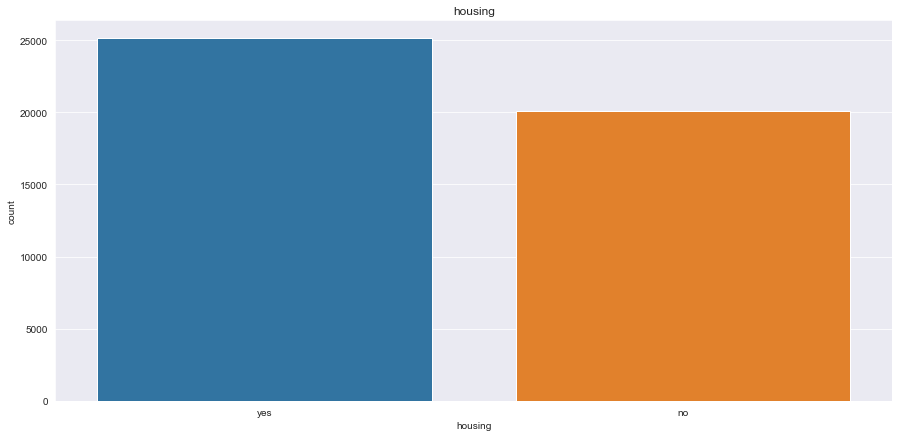

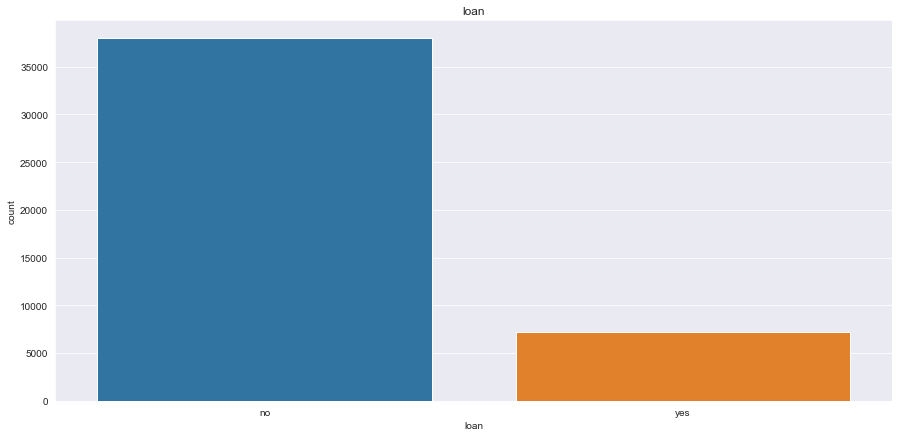

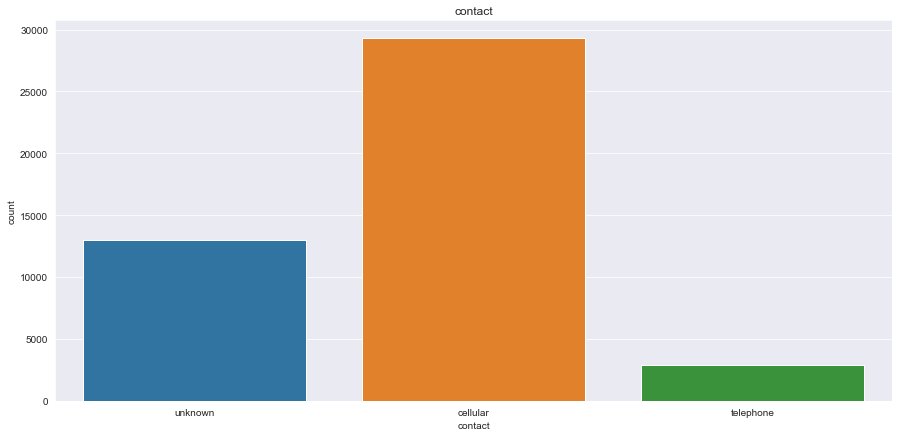

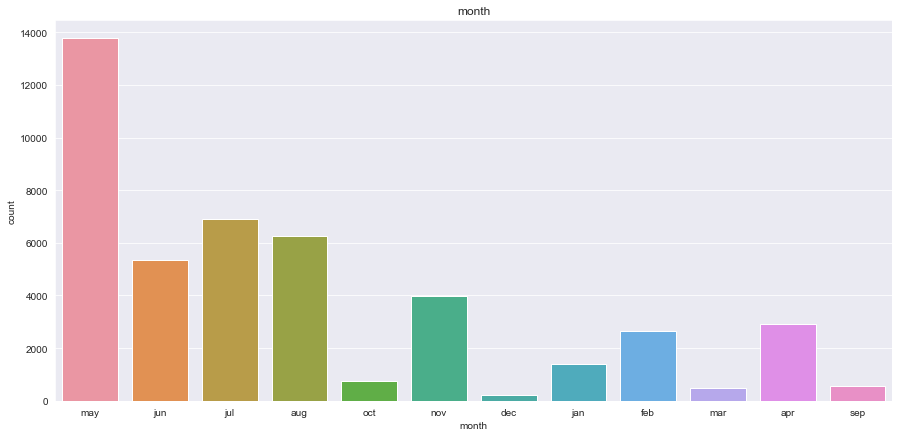

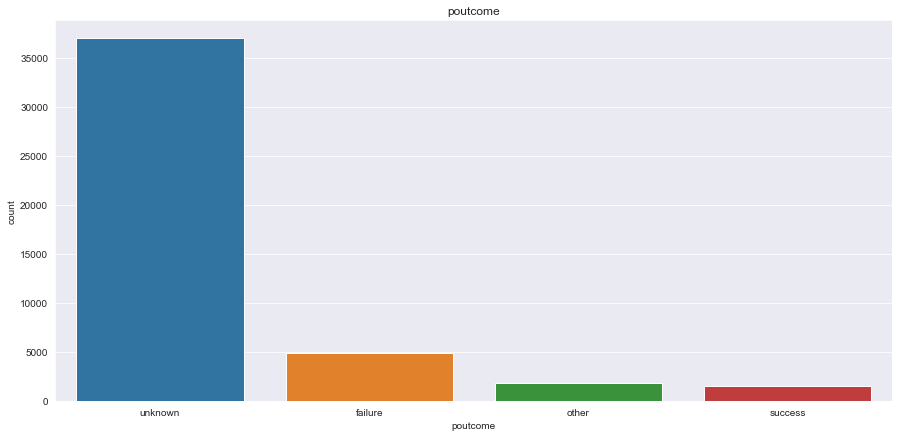

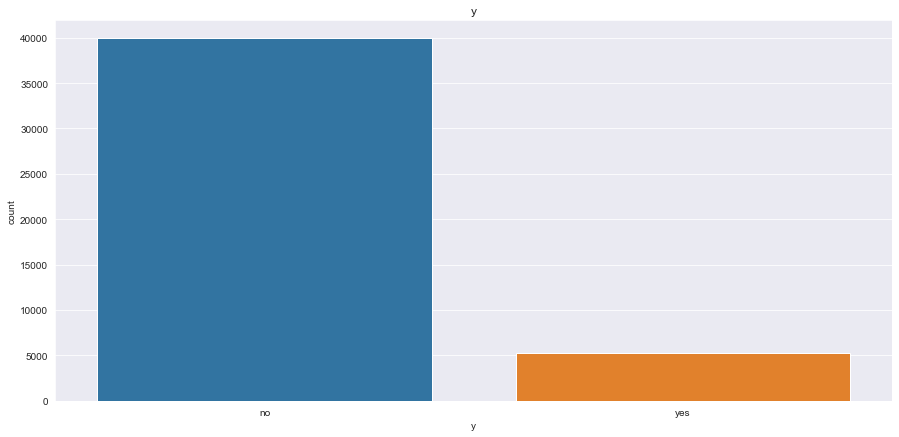

In [14]:
for i in obj:
    plt.figure(figsize= (15,7))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

#### Frequency of output "y" variable

<AxesSubplot:xlabel='y', ylabel='count'>

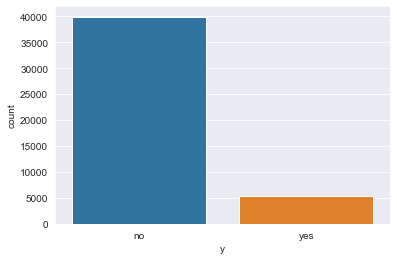

In [15]:
sns.countplot(data["y"])

- The data is imbalanced in this dataset

#### Performing one hot encoding on categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(le.fit_transform)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


#### dividing data into X and y

In [17]:
X = data.iloc[:,:16]
y = data["y"]

## Creating Model

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [19]:
classifier.fit(X,y)

LogisticRegression()

#### classes

In [20]:
classifier.classes_

array([0, 1])

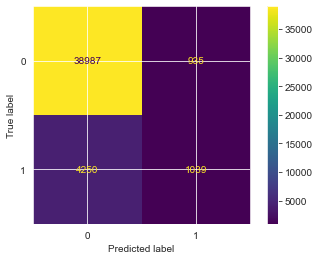

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,X,y)
plt.show()

In [22]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Text(0, 0.5, 'True Positive Rate')

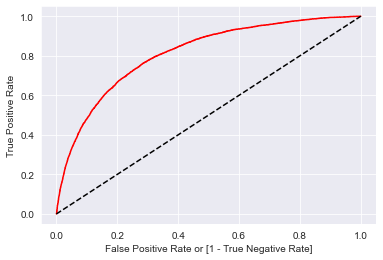

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [25]:
auc

0.5865123912597613

In [24]:
Logit_roc_score=roc_auc_score(y,y_pred)
Logit_roc_score

0.5865123912597613

In [28]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

The output data is imbalanced.

## Performance Metrics

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.53      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.71      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211

